# Analyzing gene expression
___________________________________

# Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get data

I generated this file with `bedtools map`.

In [2]:
df = pd.read_csv('FPKM_with_compartments.bed', header=None, sep='\t')
df

,0,1,2,3,4,5,6,7
0,chr3,238279,451090,CHL1,0.00,+,0.217979,B
1,chr3,1134260,1445901,CNTN6,0.00,+,0.212417,B
2,chr3,2140497,3099645,CNTN4,0.01,+,0.271694,B
3,chr3,3111233,3168297,IL5RA,0.14,-,1.567160,A
4,chr3,3168600,3192563,TRNT1,25.28,+,0.168837,A
...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,0.170634,A
1060,chr3,197518097,197615307,LRCH3,24.13,+,0.174287,A
1061,chr3,197615946,197687013,IQCG,3.70,-,0.264840,A
1062,chr3,197676858,197683481,RPL35A,1195.67,+,0.173857,A


# Plot methylation scores

In [3]:
exp = np.log2(df[6] + 1)
exp

0       0.284489
1       0.277886
2       0.346752
3       1.360173
4       0.225074
          ...   
1059    0.227290
1060    0.231785
1061    0.338955
1062    0.231257
1063    0.191306
Name: 6, Length: 1064, dtype: float64

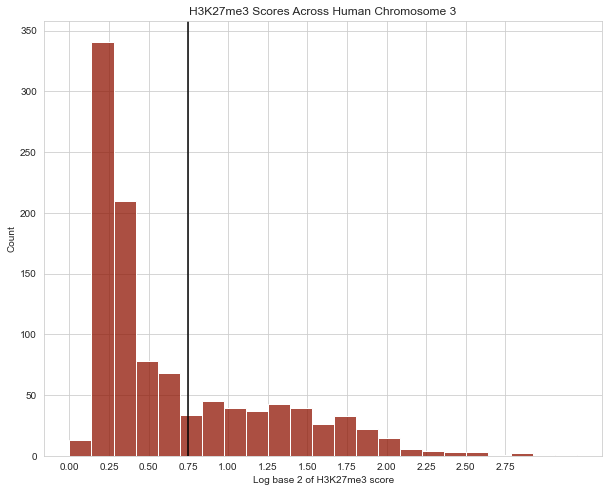

In [4]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))

sns.histplot(exp, ax=ax, bins=23, color='xkcd:brick red')
ax.set_xlabel('Log base 2 of H3K27me3 score')
ax.set_xticks([a/4 for a in range(0, 12)])
ax.set_title('H3K27me3 Scores Across Human Chromosome 3')
plt.axvline(0.75, color='black')

plt.savefig('expression_histogram.jpg')
plt.show()

Based on this graph, I am choosing log<sub>2</sub>(score) = 0.75 as the cutoff.

# Analyzing expression

First, seperate the genes into 4 categories based on compartment and whether they are off/on.

In [5]:
cutoff = 0.75
a_on, a_off, b_on, b_off = (0, 0, 0, 0)
data = {}

for idx, row in df.iterrows():
    if row[7] == 'A':
        if row[6] >= cutoff:
            a_off += 1
            to_add = 'A/Off'
        else:
            a_on += 1
            to_add = 'A/On'
    elif row[7] == 'B':
        if row[6] >= cutoff:
            b_off += 1
            to_add = 'B/Off'
        else:
            b_on += 1
            to_add = 'B/On'
    else:
        to_add = np.nan
    
    data[idx] = to_add
            
df['comp/expr'] = pd.Series(data=data, index=range(len(df)))
print('A On: {}\nA Off: {}\nB On: {}\nB Off: {}'.format(a_on, a_off, b_on, b_off))
df

A On: 650
A Off: 310
B On: 85
B Off: 12


,0,1,2,3,4,5,6,7,comp/expr
0,chr3,238279,451090,CHL1,0.00,+,0.217979,B,B/On
1,chr3,1134260,1445901,CNTN6,0.00,+,0.212417,B,B/On
2,chr3,2140497,3099645,CNTN4,0.01,+,0.271694,B,B/On
3,chr3,3111233,3168297,IL5RA,0.14,-,1.567160,A,A/Off
4,chr3,3168600,3192563,TRNT1,25.28,+,0.168837,A,A/On
...,...,...,...,...,...,...,...,...,...
1059,chr3,197464050,197514467,FYTTD1,53.14,+,0.170634,A,A/On
1060,chr3,197518097,197615307,LRCH3,24.13,+,0.174287,A,A/On
1061,chr3,197615946,197687013,IQCG,3.70,-,0.264840,A,A/On
1062,chr3,197676858,197683481,RPL35A,1195.67,+,0.173857,A,A/On


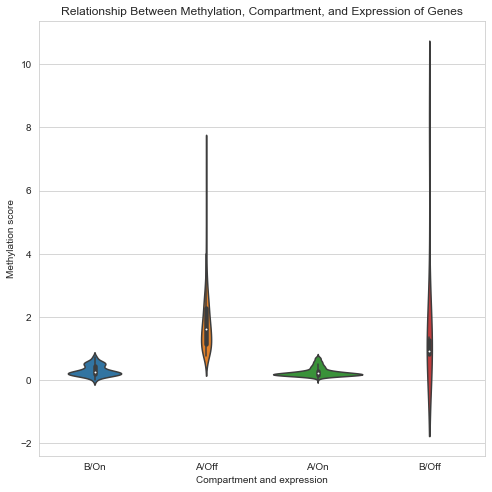

In [6]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(8,8))

sns.violinplot(x='comp/expr', y=6, data=df)
ax.set_xlabel('Compartment and expression')
ax.set_ylabel('Methylation score')
ax.set_title('Relationship Between Methylation, Compartment, and Expression of Genes')

plt.savefig('violin_plot.jpg')
plt.show()